In [1]:
#!nvidia-smi

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re
import datetime

# #Vectorization and Tokenizing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MaxAbsScaler

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer


# #DNN Modules
# import torch
# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import InputLayer
# from tensorflow.keras import losses
# from tensorflow.keras.regularizers import L2
# from tensorflow.keras.utils import plot_model
# from tensorflow.keras.layers import TextVectorization


# #Models
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import LinearRegression


# #Metrics and Testing
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix

In [4]:
#My Lenovo
#df1 = pd.read_csv('/Data/CERT/r4.2/logon.csv')
#df2 = pd.read_csv('/Data/CERT/r4.2/device.csv')
#df3 = pd.read_csv('/Data/CERT/r4.2/email.csv')
#df4 = pd.read_csv('/Data/CERT/r4.2/file.csv')
#df5 = pd.read_csv('/Data/CERT/r4.2/http.csv')
#df6 = pd.read_csv('/Data/CERT/r4.2/psychometric.csv')

#My MacBook
df1 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/logon.csv')
df2 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/device.csv')
df3 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/email.csv')
df4 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/file.csv')
df5 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/http.csv')
ans = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/answers/answers.csv')
#df6 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/psychometric.csv')


#Google Drive - Colab
# df1 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/logon.csv')
# df2 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/device.csv')
# df3 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/http.csv')
# df4 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/email.csv')
# df5 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/file.csv')
# df6 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/psychometric.csv')

In [5]:
START = datetime.date(2010,1,1)
END = datetime.date(2010,12,31)

In [6]:
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])
df3['date'] = pd.to_datetime(df3['date'])
df4['date'] = pd.to_datetime(df4['date'])
df5['date'] = pd.to_datetime(df5['date'])

df1['day_date'] = pd.to_datetime(df1['date']).dt.date
df2['day_date'] = pd.to_datetime(df2['date']).dt.date
df3['day_date'] = pd.to_datetime(df3['date']).dt.date
df4['day_date'] = pd.to_datetime(df4['date']).dt.date
df5['day_date'] = pd.to_datetime(df5['date']).dt.date

In [7]:
df3['activity'] = "email"
df4['activity'] = "file"
df5['activity'] = "http"

In [8]:
df1_bs = df1[((df1['day_date'] >= START) & (df1['day_date'] <= END))]
df2_bs = df2[((df2['day_date'] >= START) & (df2['day_date'] <= END))]
df3_bs = df3[((df3['day_date'] >= START) & (df3['day_date'] <= END))]
df4_bs = df4[((df4['day_date'] >= START) & (df4['day_date'] <= END))]
df5_bs = df5[((df5['day_date'] >= START) & (df5['day_date'] <= END))]

In [9]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
def prepare_text(pretext):

    # tokenize mission.
    tokens = word_tokenize(pretext, language="english", preserve_line=True)

    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = (tok for tok, tag in token_tag if tag in include_tags)    
    
    #stem words.
    stemmed_tokens = (lancaster.stem(tok) for tok in filtered_tokens)

    #lemm words.
    lemmed_words = (lemmatizer.lemmatize(tok) for tok in stemmed_tokens)

    lower_words = [str.lower(tok) for tok in lemmed_words]

    #x = cv.fit_transform(tokens).toarray()

    joined = " ".join(lower_words)

    return(joined)

#ps = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
df3_bs['df3tokenized'] = df3_bs['content'].apply(prepare_text)
df4_bs['df4tokenized'] = df4_bs['content'].apply(prepare_text)
df5_bs['df5tokenized'] = df5_bs['content'].apply(prepare_text)

/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_81286/614576161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_bs['df3tokenized'] = df3_bs['content'].apply(prepare_text)
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_81286/614576161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_bs['df4tokenized'] = df4_bs['content'].apply(prepare_text)
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_81286/614576161.py:3: SettingWithCopyWarning: 
A value is trying to be se

In [11]:
nltk.download('stopwords')
stops = set(stopwords.words('english'))
tfidfvectorizer = TfidfVectorizer(stop_words='english', analyzer='word' )

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
tfidf_df3 = tfidfvectorizer.fit_transform(df3_bs['df3tokenized'])
df3_bs['df3tfidf_mean'] = ((tfidf_df3.sum(axis=1).transpose()) / (tfidf_df3.getnnz(axis=1))).transpose()


/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_81286/1939301759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_bs['df3tfidf_mean'] = ((tfidf_df3.sum(axis=1).transpose()) / (tfidf_df3.getnnz(axis=1))).transpose()


In [13]:
tfidf_df4 = tfidfvectorizer.fit_transform(df4_bs['df4tokenized'])
df4_bs['df4tfidf_mean'] = ((tfidf_df4.sum(axis=1).transpose()) / (tfidf_df4.getnnz(axis=1))).transpose()

/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_81286/3384156628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_bs['df4tfidf_mean'] = ((tfidf_df4.sum(axis=1).transpose()) / (tfidf_df4.getnnz(axis=1))).transpose()


In [14]:
tfidf_df5 = tfidfvectorizer.fit_transform(df5_bs['df5tokenized'])
df5_bs['df5tfidf_mean'] = ((tfidf_df5.sum(axis=1).transpose()) / (tfidf_df5.getnnz(axis=1))).transpose()

/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_81286/726549895.py:2: RuntimeWarning: invalid value encountered in divide
  df5_bs['df5tfidf_mean'] = ((tfidf_df5.sum(axis=1).transpose()) / (tfidf_df5.getnnz(axis=1))).transpose()
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_81286/726549895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_bs['df5tfidf_mean'] = ((tfidf_df5.sum(axis=1).transpose()) / (tfidf_df5.getnnz(axis=1))).transpose()


Aggregate all data

In [15]:
# df1['date'] = pd.to_datetime(df1['date'])
# df2['date'] = pd.to_datetime(df2['date'])

In [16]:
# df1['day_date'] = pd.to_datetime(df1['date']).dt.date
# df2['day_date'] = pd.to_datetime(df2['date']).dt.date

In [17]:
# df1['day_date'] = pd.to_datetime(df1['day_date'])
# df2['day_date'] = pd.to_datetime(df2['day_date'])

In [18]:

# df1_bs = df1[((df1['day_date'] >= datetime.date(2010, 7, 1)) & (df1['day_date'] <= datetime.date(2010, 7, 15)))]
# df2_bs = df2[((df2['day_date'] >= datetime.date(2010, 7, 1)) & (df2['day_date'] <= datetime.date(2010, 7, 15)))]

# df1_bs = df1[((df1['day_date'] <= datetime.datetime(2010, 7, 7)) & (df1['day_date'] >= datetime.datetime(2010, 7, 1)))]
# df2_bs = df2[((df1['day_date'] <= datetime.datetime(2010, 7, 7)) & (df1['day_date'] >= datetime.datetime(2010, 7, 1)))]

In [19]:
df_merged = pd.concat([df1_bs, df2_bs, df3_bs, df4_bs, df5_bs])

In [20]:
df_merged['label'] = 'normal'

In [21]:
df_merged.loc[df_merged['id'].isin(ans['id']),['label']] = 'bad'

In [22]:
dates = df_merged['day_date']
dates = dates.unique()

In [23]:
dfwow = []
for d in dates:
    dayevents = df_merged.loc[(df_merged['day_date'] == d)]
    users = dayevents['user']
    users = users.unique()
    for u in users:
        userd = dayevents[(dayevents['user'] == u)]
        date = d
        username = u
        login_count = userd[userd['activity'] == 'Logon'].shape[0]
        logout_count = userd[userd['activity'] == 'Logoff'].shape[0]
        email_count = userd[userd['to'].notnull()].shape[0]
        file_count = userd[userd['filename'].notnull()].shape[0]
        http_count = userd[userd['url'].notnull()].shape[0]
        start_time = userd['date'].iloc[0]
        end_time = userd['date'].iloc[-1]
        tfidf3_mean = userd['df3tfidf_mean'].mean()
        tfidf4_mean = userd['df4tfidf_mean'].mean()
        tfidf5_mean = userd['df5tfidf_mean'].mean()
        if (userd[(userd['label'] == 'bad')].shape[0] > 0): label='bad'
        else: label = 'normal'
        dfwow.append([date, username, login_count, logout_count, email_count, file_count, http_count, start_time, end_time, tfidf3_mean, tfidf4_mean, tfidf5_mean, label])


In [24]:
len(dfwow)

246423

In [25]:
final = pd.DataFrame(dfwow, columns=['date', 'username', 'login_count', 'logout_count', 'email_count', 'file_count', 'http_count', 'start_time', 'end_time', 'tfidf3_mean', 'tfidf4_mean', 'tfidf5_mean', 'label'])


In [26]:
final.loc[(final['label'] == 'bad')]

,date,username,login_count,logout_count,email_count,file_count,http_count,start_time,end_time,tfidf3_mean,tfidf4_mean,tfidf5_mean,label
112111,2010-06-10,CSC0217,8,8,13,1,117,2010-06-10 04:54:27,2010-06-10 20:46:23,0.190913,0.104145,0.176544,bad
112250,2010-06-10,FAW0032,1,1,16,0,143,2010-06-10 07:19:00,2010-06-10 15:18:02,0.186064,NaN,0.171141,bad
113063,2010-06-11,CSC0217,7,7,11,0,114,2010-06-11 00:15:51,2010-06-11 22:22:21,0.170272,NaN,0.165787,bad
113266,2010-06-11,FAW0032,2,2,15,0,143,2010-06-11 07:35:00,2010-06-11 15:03:25,0.170810,NaN,0.175687,bad
114950,2010-06-14,PNL0301,1,1,1,5,15,2010-06-14 08:54:00,2010-06-14 17:45:50,0.172077,0.150751,0.173485,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245032,2010-12-29,IKR0401,1,1,12,0,100,2010-12-29 08:03:00,2010-12-29 18:56:08,0.171989,NaN,0.172006,bad
245112,2010-12-29,CCL0068,1,1,9,2,96,2010-12-29 08:10:00,2010-12-29 17:52:12,0.170253,0.137990,0.170445,bad
245844,2010-12-30,IKR0401,1,1,9,0,101,2010-12-30 08:01:00,2010-12-30 18:50:36,0.173158,NaN,0.170731,bad
245966,2010-12-30,CCL0068,1,1,10,1,105,2010-12-30 08:07:00,2010-12-30 17:32:41,0.162939,0.138390,0.171746,bad


In [28]:
final.loc[(final['label'] == 'normal')]

,date,username,login_count,logout_count,email_count,file_count,http_count,start_time,end_time,tfidf3_mean,tfidf4_mean,tfidf5_mean,label
0,2010-01-02,NGF0157,2,1,9,0,90,2010-01-02 06:49:00,2010-01-02 17:01:34,0.187988,NaN,0.170078,normal
1,2010-01-02,LRR0148,3,2,14,1,143,2010-01-02 06:50:00,2010-01-02 17:02:30,0.176234,0.137946,0.177495,normal
2,2010-01-02,IRM0931,3,2,9,0,95,2010-01-02 07:00:00,2010-01-02 16:14:34,0.234186,NaN,0.169313,normal
3,2010-01-02,MOH0273,1,1,9,23,95,2010-01-02 07:00:00,2010-01-02 17:02:39,0.173157,0.153119,0.170390,normal
4,2010-01-02,LAP0338,1,1,3,0,29,2010-01-02 07:07:00,2010-01-02 15:26:07,0.177690,NaN,0.179845,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246418,2010-12-31,HLH0512,1,1,3,0,29,2010-12-31 09:03:00,2010-12-31 16:56:13,0.179114,NaN,0.172772,normal
246419,2010-12-31,QJR0688,2,2,9,0,95,2010-12-31 09:04:00,2010-12-31 19:01:56,0.174379,NaN,0.170087,normal
246420,2010-12-31,JJH0292,2,1,1,0,10,2010-12-31 09:07:00,2010-12-31 17:29:27,0.158595,NaN,0.170680,normal
246421,2010-12-31,NMS0280,1,1,3,0,30,2010-12-31 09:16:00,2010-12-31 17:56:59,0.163554,NaN,0.171991,normal


<Axes: xlabel='label', ylabel='count'>

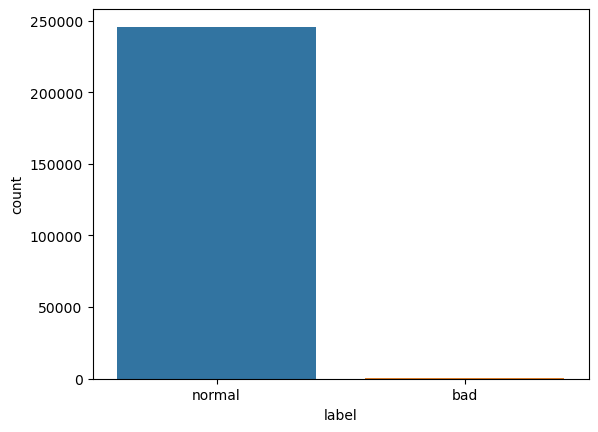

In [27]:
sb.countplot(data=final, x='label')